In [14]:
import healpy
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import sys
sys.path.append("../../")
from experiments.weather.metrics import MeteorologicalData


[Compute environment] paths: 
[Paths] checkpoints: checkpoints (/Users/hampus/projects/equivariant-posteriors/experiments/weather/checkpoints)
[Paths] locks: locks (/Users/hampus/projects/equivariant-posteriors/experiments/weather/locks)
[Paths] distributed_requests: distributed_requests (/Users/hampus/projects/equivariant-posteriors/experiments/weather/distributed_requests)
[Paths] artifacts: artifacts (/Users/hampus/projects/equivariant-posteriors/experiments/weather/artifacts)
[Paths] datasets: datasets (/Users/hampus/projects/equivariant-posteriors/experiments/weather/datasets)
[Compute environment] postgres_host: localhost
[Compute environment] postgres_port: 5431
[Compute environment] postgres_password: herdeherde


In [34]:
data_surface = np.load("spatial_rmse_supplemental/Pangu/spatial_rmse_surface_e220_1d_dh_unweighted.npydh.npy")
data_upper = np.load("spatial_rmse_supplemental/Pangu/spatial_rmse_upper_e220_1d_dh_unweighted.npydh.npy")

data_surface_pear = np.load("spatial_rmse_supplemental/PEAR/spatial_rmse_surface_1d_hp.npy.npy")
data_upper_pear = np.load("spatial_rmse_supplemental/PEAR/spatial_rmse_upper_1d_hp.npy.npy")

In [35]:
vmin1  = data_surface.reshape((4, -1)).min(axis=1)   # per-variable limits
vmax1  = data_surface.reshape((4, -1)).max(axis=1)

vmin2  = data_surface_pear.reshape((4, -1)).min(axis=1)   # per-variable limits
vmax2  = data_surface_pear.reshape((4, -1)).max(axis=1)

vmin = np.array([vmin1, vmin2]).min(axis=0)
vmax = np.array([vmax1, vmax2]).max(axis=0)

vmins1  = data_upper.reshape((5, -1)).min(axis=1)   # per-variable limits
vmaxs1  = data_upper.reshape((5, -1)).max(axis=1)

vmins2  = data_upper_pear.reshape((5, -1)).min(axis=1)   # per-variable limits
vmaxs2  = data_upper_pear.reshape((5, -1)).max(axis=1)

vmins = np.array([vmins1, vmins2]).min(axis=0)
vmaxs = np.array([vmaxs1, vmaxs2]).max(axis=0)

In [36]:
meta = MeteorologicalData()
meta

MeteorologicalData(surface=Category(names=['msl', 'u10', 'v10', 't2m'], long_names=['Mean sea level pressure', '10 metre U wind component', '10 metre V wind component', '2 metre temperature'], units=['Pa', 'm s**-1', 'm s**-1', 'K'], levels=[], level_units='hPa', level_name='Geopotential height'), upper=Category(names=['z', 'q', 't', 'u', 'v'], long_names=['Geopotential', 'Specific humidity', 'Temperature', 'U component of wind', 'V component of wind'], units=['m**2 s**-2', 'kg kg**-1', 'K', 'm s**-1', 'm s**-1'], levels=[1000.0, 925.0, 850.0, 700.0, 600.0, 500.0, 400.0, 300.0, 250.0, 200.0, 150.0, 100.0, 50.0], level_units='hPa', level_name='Geopotential height'))

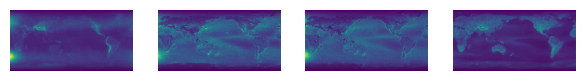

In [9]:
#healpy.mollview(data[3, :], nest=True)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(7.3,2))
for i in range(4):
    plt.axes(ax[i])
    plt.imshow(data_surface[i, :, :])
    ax[i].set_axis_off()
    #healpy.cartview(data_surface[i, :], nest=True, title=meta.surface.names[i], hold=True)

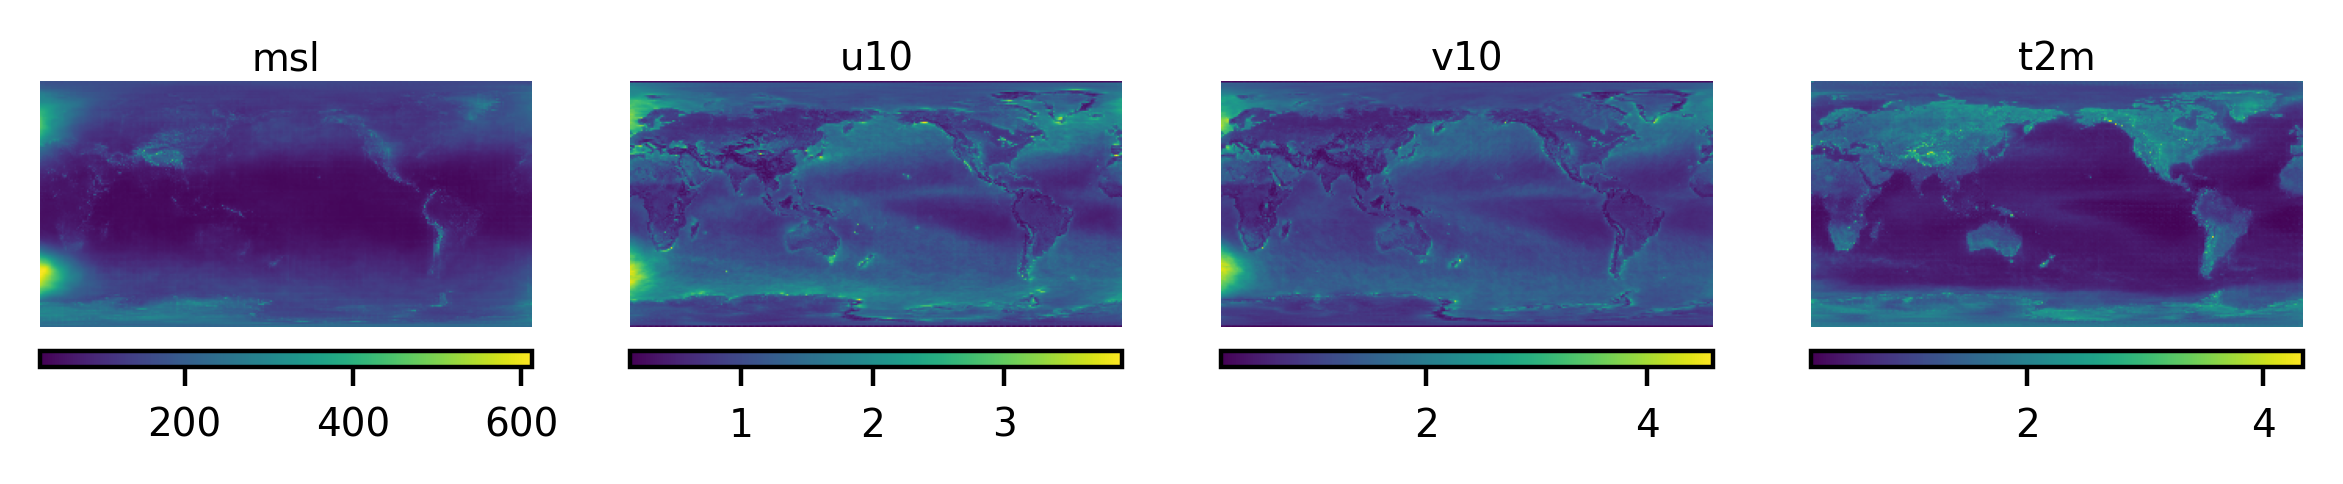

In [43]:
fig, ax = plt.subplots(1, 4, figsize=(7.3, 1.0), dpi=400)
cmap  = 'viridis'
#vmin  = data_surface.reshape((4, -1)).min(axis=1)   # per-variable limits
#vmax  = data_surface.reshape((4, -1)).max(axis=1)

for var in range(4):
    plt.axes(ax[var])
    #healpy.cartview(data_surface[var], nest=True,
    #            title='', cbar=False,
    #            cmap=cmap, min=vmin[var], max=vmax[var],
    #            hold=True)
    nlat = data_surface[var].shape[1]
    ax[var].imshow(np.roll(data_surface[var], 0, 1), vmin=vmin[var], vmax=vmax[var])
    ax[var].set_axis_off()
    # column header
    pos = ax[var].get_position()
    fig.text(pos.x0 + pos.width/2, pos.y1 + 0.01,
             meta.surface.names[var], ha='center', va='bottom', fontsize=7)

    # colour-bar under the map
    cax = fig.add_axes([pos.x0, pos.y0 - 0.1, pos.width, 0.04])
    sm  = mpl.cm.ScalarMappable(cmap=cmap,
                                norm=mpl.colors.Normalize(vmin=vmin[var], vmax=vmax[var]))
    fig.colorbar(sm, cax=cax, orientation='horizontal').ax.tick_params(labelsize=7)

fig.savefig("spatial_rmse_surface_pangu.pdf", bbox_inches="tight")

In [38]:
data_upper.shape

(5, 13, 157, 314)

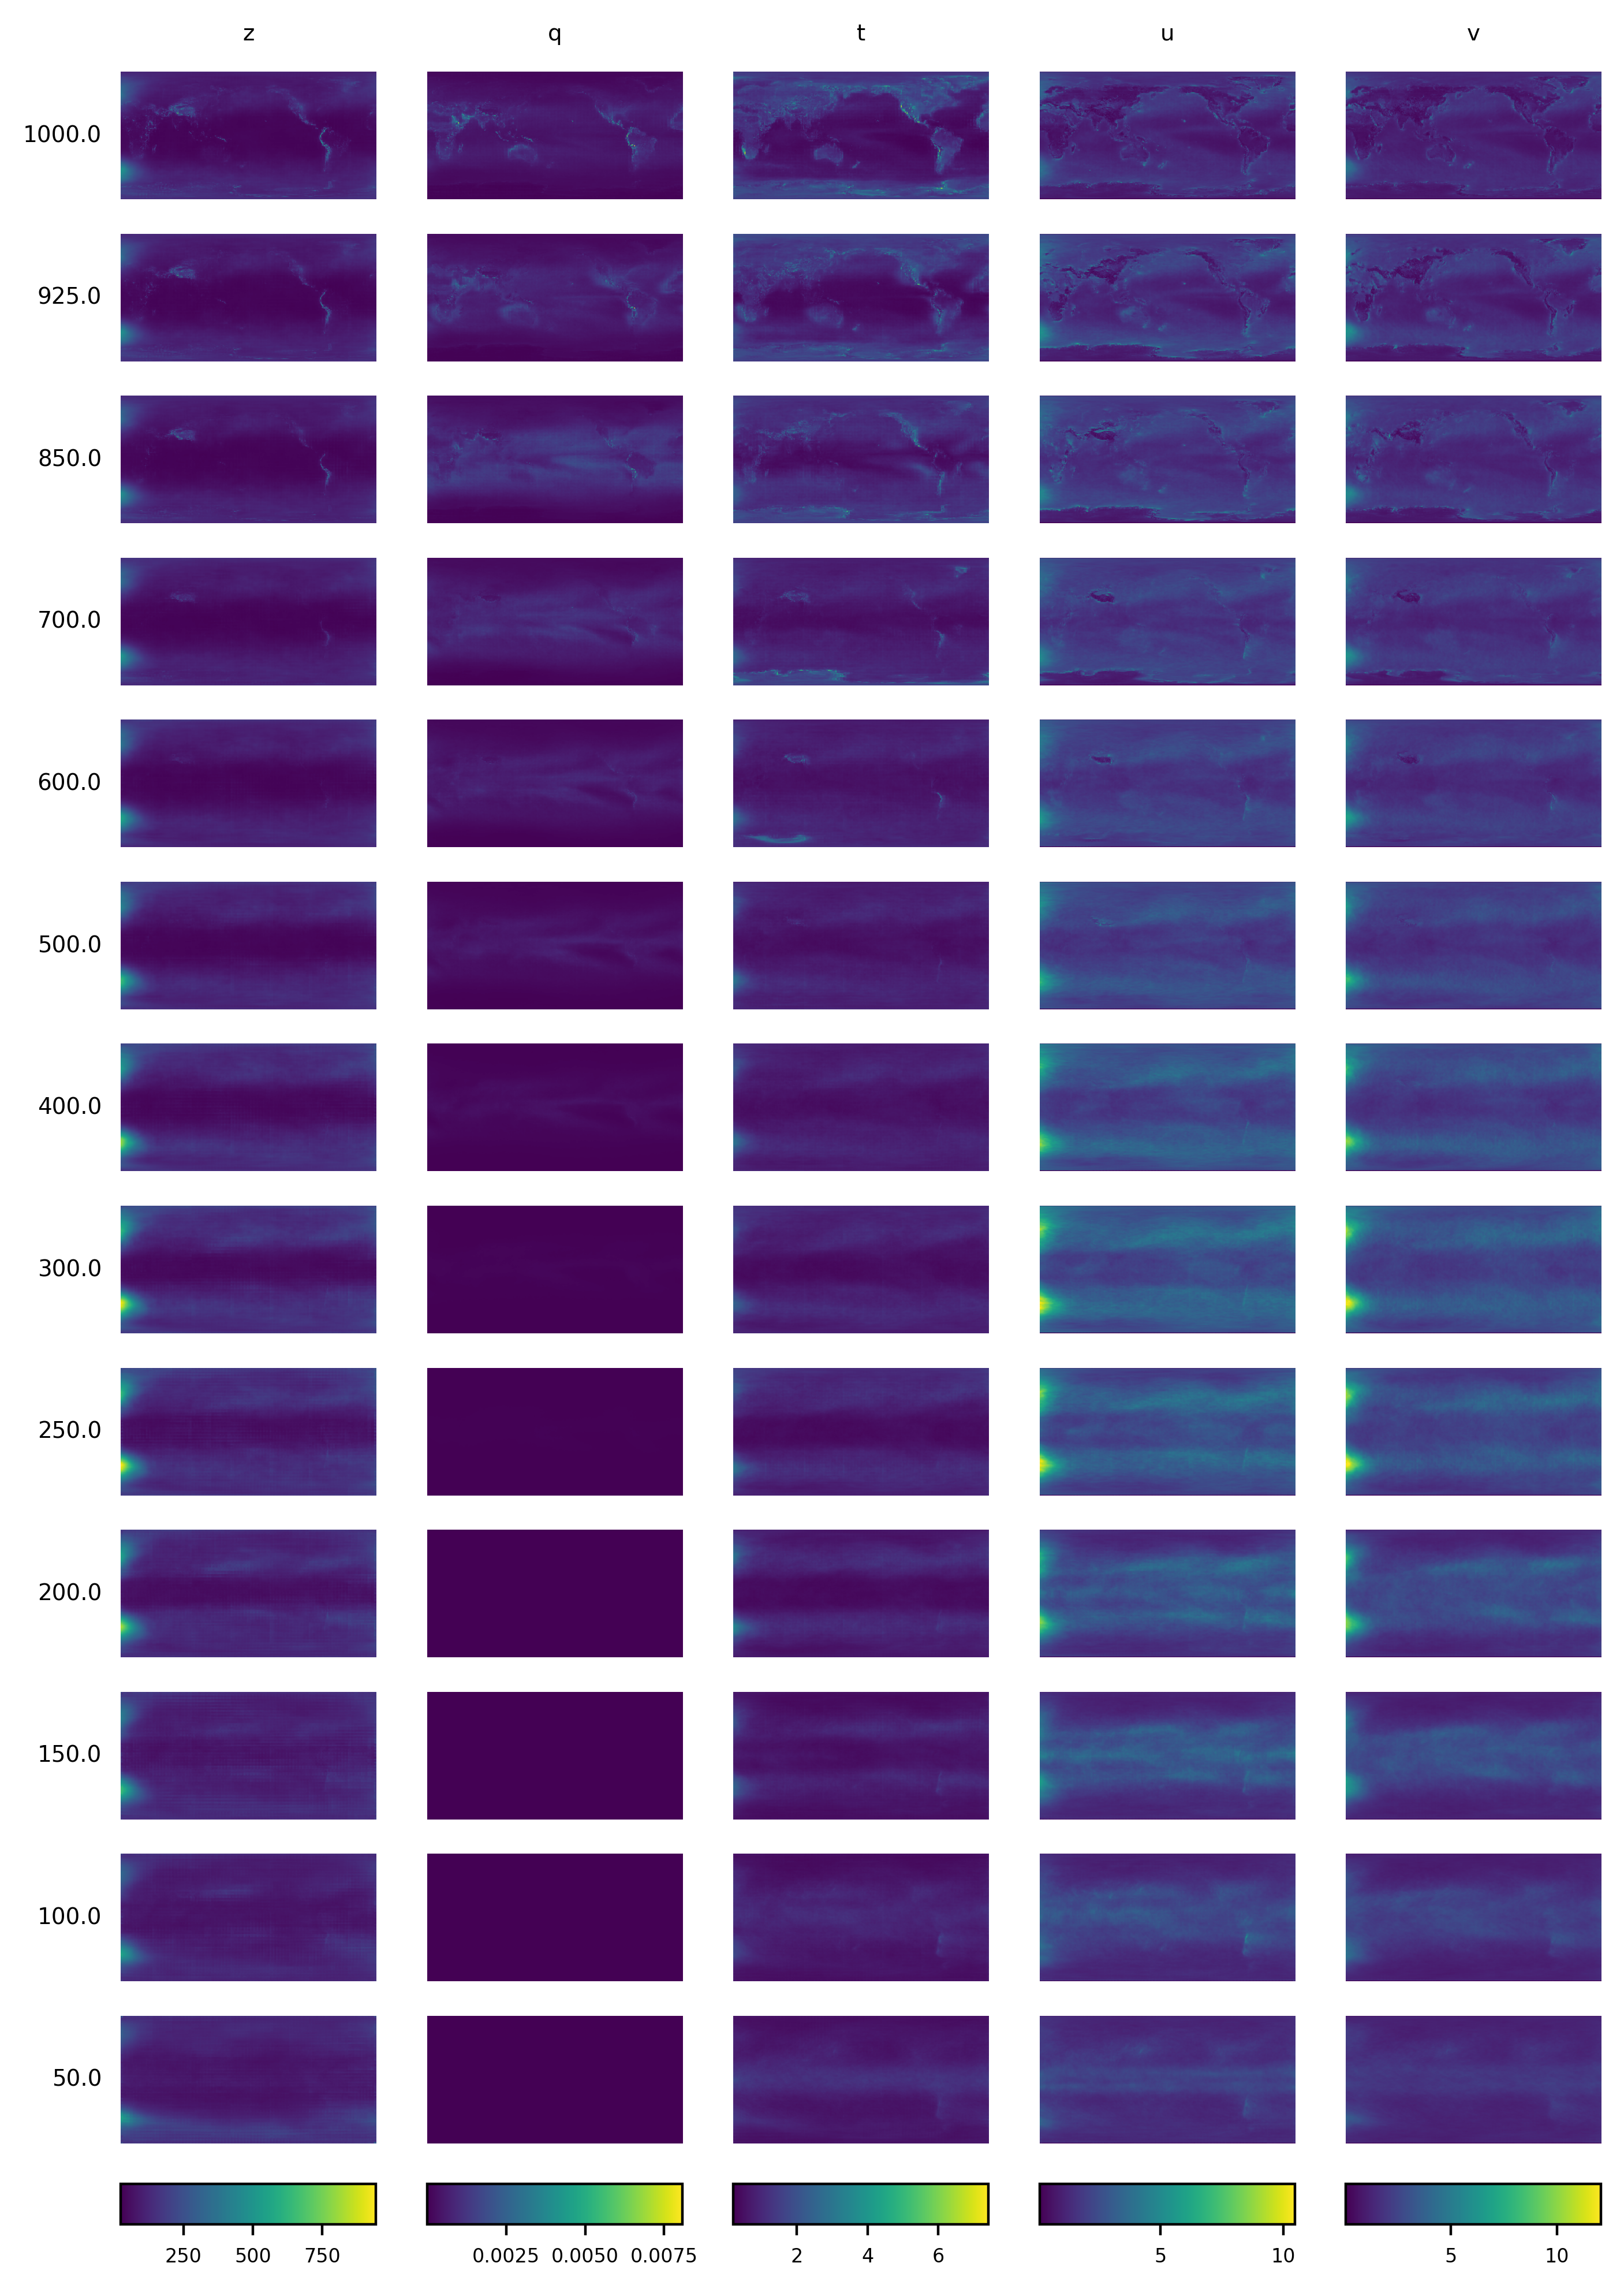

In [42]:
#healpy.mollview(data[3, :], nest=True)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

# Set font size to match LaTeX \small (approx. 9–10pt)
rcParams.update({
    'font.size': 6,
    'axes.titlesize': 6,
    'axes.labelsize': 6,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 6
})
levels = data_upper.shape[1]
fig, ax = plt.subplots(levels, 5, figsize=(8.27, 11.69), dpi=400)
#vmins = data_upper.reshape((5, -1)).min(axis=1)
#vmaxs = data_upper.reshape((5, -1)).max(axis=1)

for level in range(levels):
    for var in range(5):
        title = f"{meta.upper.levels[level]} | {meta.upper.names[var]}"
        plt.axes(ax[level, var])
        nlat = data_upper[var, level].shape[1]
        ax[level, var].imshow(np.roll(data_upper[var, level], 0, 1), vmin=vmins[var], vmax=vmaxs[var])
        ax[level, var].set_axis_off()
        #healpy.cartview(
        #    data_upper[var, level, :], 
        #    nest=True, title='', hold=True, min=vmins[var], max=vmaxs[var], cbar=False,
        #)
        ax[level,var].title.set_position([0.5, .02])

for var, name in enumerate(meta.upper.names):
    pos = ax[0, var].get_position()              # first row → column bbox
    fig.text(pos.x0 + pos.width/2,              # horizontal centre
             pos.y1 + 0.01,                     # a hair above the axes
             name, ha='center', va='bottom', fontsize=7)

# row labels (levels)
for lvl, label in enumerate(meta.upper.levels):
    pos = ax[lvl, 0].get_position()              # first column → row bbox
    fig.text(pos.x0 - 0.01,                     # a hair left of the axes
             pos.y0 + pos.height/2,             # vertical centre
             label, ha='right', va='center', fontsize=7)

for var in range(5):
    pos  = ax[-1, var].get_position()                 # bottom row of this column
    cax  = fig.add_axes([pos.x0, pos.y0 - 0.03, pos.width, 0.015])
    sm   = mpl.cm.ScalarMappable(cmap='viridis',
                                 norm=mpl.colors.Normalize(vmin=vmins[var],
                                                           vmax=vmaxs[var]))
    fig.colorbar(sm, cax=cax, orientation='horizontal')
    cax.tick_params(labelsize=6)
#plt.tight_layout(rect=(0.05, 0.05, 0.95, 0.95))  # keep margins for labels

fig.savefig("spatial_rmse_upper_pangu.pdf", bbox_inches="tight")

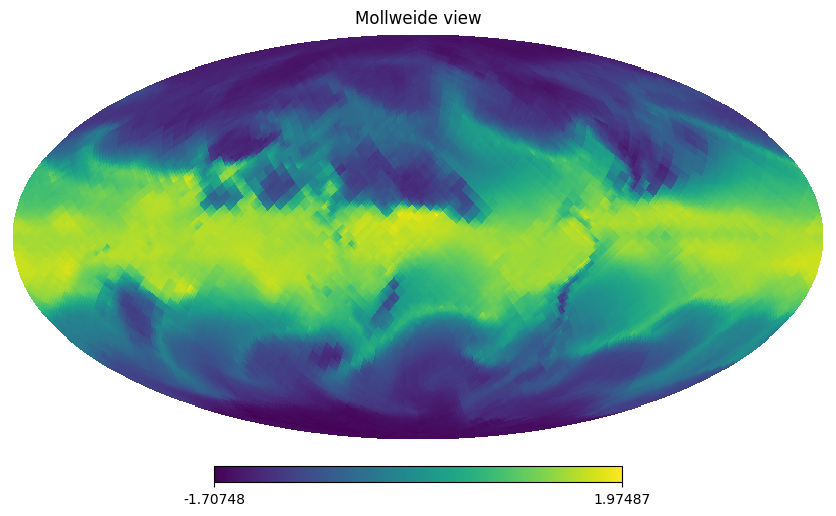

In [6]:
healpy.mollview(data[0, 1, 1, :], nest=True)

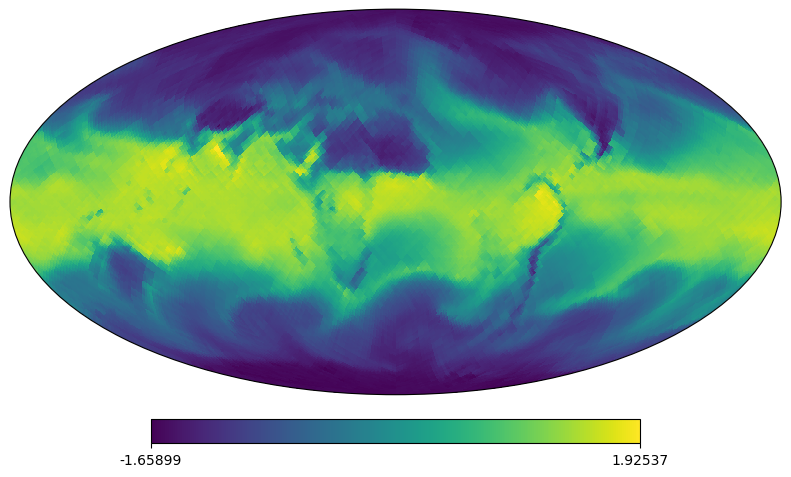

In [31]:
healpy.projview(data[0, 1, 0, :], projection_type="mollweide", nest=True)
healpy.newprojplot(